## Load Libraries

In [1]:
suppressPackageStartupMessages({ 
    library(data.table) 
    library(dplyr) 
    library(ggplot2) 
    library(SingleCellExperiment)
    library(dplyr)
    library(celldex)
    library(SingleR)
    library(RColorBrewer)
    library(scater) 
    library(StabMap) 
    library(scran) 
    library(harmony) 
    library(patchwork)
    library(Seurat)
    library(plotly)
    library(pheatmap)
    library(batchelor)
    library(ggridges)
    library(grid)
    library(png)
    library(abind)
    library(UpSetR)
    library(stats)
    library(tidyr)
})

# Pipeline #1 (STABMAP + ReducedMNN) Generate a Low-Dimensional Embedding

In [2]:
# The first step in the bioinformatics involves using StabMAP and reducedMNN to project query, scRNA and seqFISH cells into a common low-dimensional embedding
# This low dimensional embedding will then be used to transfer information from the spatiotemporal atlas (scRNA+seqFISH cells) to the query dataset in pipeline #2

## Data Locations

In [3]:
##### Load in Seurat Objects #####

io = list()
io$main = "/rds/project/rds-SDzz0CATGms/users/ltgh2" # this is the main directory

io$gastruloids = file.path(io$main, "projects/13_gastruloid_datasets/datasets/GSE158999_seurat_object/cardiovascular_gastruloids_seurat.Rds")
io$atlas = file.path(io$main, "projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds")
io$seqFISH = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds")
io$seqFISH_preQC = file.path(io$main, "projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds") 

In [4]:
# Set the working directory
setwd(io$main)

In [5]:
io

$main
[1] "/rds/project/rds-SDzz0CATGms/users/ltgh2"

$gastruloids
[1] "/rds/project/rds-SDzz0CATGms/users/ltgh2/projects/13_gastruloid_datasets/datasets/GSE158999_seurat_object/cardiovascular_gastruloids_seurat.Rds"

$atlas
[1] "/rds/project/rds-SDzz0CATGms/users/ltgh2/projects/03_seqFISH_FINAL/code/extended_atlas_integration/processed_downsampled/downsample_10K_within_timpoint_all_stages.Rds"

$seqFISH
[1] "/rds/project/rds-SDzz0CATGms/users/ltgh2/projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_after_QC_filtering_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds"

$seqFISH_preQC
[1] "/rds/project/rds-SDzz0CATGms/users/ltgh2/projects/03_seqFISH_FINAL/code/seqFISH_integration/processed/seqFISH_within_and_across_dataset_integration_without_neighbour_features_E6_7_8.Rds"

## Load in R Scripts

In [6]:
script_files <- list.files("projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/R_scripts", 
                           pattern = "\\.[rR]$", full.names = TRUE)

lapply(script_files, source)

[[1]]
[[1]]$value
function (embedding, batchFactor, ...) 
{
    require(batchelor)
    embedding <- as.matrix(embedding)
    batchFactor_used = batchFactor[rownames(embedding)]
    out = reducedMNN(embedding, batch = batchFactor_used, ...)
    resub_corrected = out$corrected
    return(resub_corrected)
}

[[1]]$visible
[1] FALSE


[[2]]
[[2]]$value
 [1] "Anterior Primitive Streak"      "Parietal endoderm"             
 [3] "Gut tube"                       "ExE endoderm"                  
 [5] "Visceral endoderm"              "ExE ectoderm distal"           
 [7] "ExE ectoderm proximal"          "Epiblast"                      
 [9] "Primitive Streak"               "Nascent mesoderm"              
[11] "PGC"                            "ExE mesoderm"                  
[13] "Haematoendothelial progenitors" "Blood progenitors"             
[15] "ExE mesoderm and Anterior LPM"  "Non-neural ectoderm"           
[17] "Ectoderm"                       "Intermediate mesoderm"         
[19] "Caudal epiblast"                "Rostral ectoderm"              

[[2]]$visible
[1] FALSE


[[3]]
[[3]]$value
 [1] "Epiblast"                          "Rostral Ectoderm"                 
 [3] "Caudal Epiblast"                   "Primitive Streak"                 
 [5] "Mesodermal Wings"                  "ExE Mesoderm"                     
 [7] "Haematoendothelial Progenitors #1" "Haematoendothelial Progenitors #2"
 [9] "Axial Mesendoderm"                 "Definitive Endoderm"              
[11] "ExE Endoderm"                      "Visceral Endoderm #1"             
[13] "Visceral Endoderm #2"              "ExE Ectoderm Proximal #1"         
[15] "ExE Ectoderm Proximal #2"          "ExE Ectoderm Distal #1"           
[17] "ExE Ectoderm Distal #2"            "low quality"                      

[[3]]$visible
[1] FALSE


[[4]]
[[4]]$value
                      low quality            ExE Ectoderm Distal #1 
                        "#E0E0E0"                         "#8A2BE2" 
           ExE Ectoderm Distal #2                          Epiblast 
                        "#7B68EE"                         "#8B4513" 
                 Rostral Ectoderm                   Caudal Epiblast 
                        "#D2691E"                         "#8B0000" 
             Visceral Endoderm #1              Visceral Endoderm #2 
                        "#6B8E23"                         "#32CD32" 
                     ExE Endoderm                 Axial Mesendoderm 
                        "#4169E1"                         "#ADD8E6" 
              Definitive Endoderm                  Primitive Streak 
                        "#000000"                         "#FFD700" 
                     ExE Mesoderm                  Mesodermal Wings 
                        "#FF8C00"                         "#FFA07A" 
Haematoendothelial Progenitors #1 Haematoendothelial Progenitors #2 
                        "#FF2400"                         "#B22222" 
         ExE Ectoderm Proximal #1          ExE Ectoderm Proximal #2 
                        "#FF1493"                         "#FF69B4" 

[[4]]$visible
[1] FALSE


[[5]]
[[5]]$value
[[5]]$value$`Anterior Primitive Streak`
[1] "Gsc"   "Foxa2"

[[5]]$value$`Parietal endoderm`
[1] "Sox7"   "Pdgfra"

[[5]]$value$`Gut tube`
[1] "Apela" "Foxa2"

[[5]]$value$`ExE endoderm`
[1] "Ttr"   "Apoa2"

[[5]]$value$`Visceral endoderm`
[1] "Spink1" "Emb"   

[[5]]$value$`ExE ectoderm distal`
[1] "Ascl2" "Gjb3" 

[[5]]$value$`ExE ectoderm proximal`
[1] "Elf5" "Perp"

[[5]]$value$Epiblast
[1] "Pou5f1" "Utf1"  

[[5]]$value$`Primitive Streak`
[1] "Nanog" "T"    

[[5]]$value$`Nascent mesoderm`
[1] "Lefty2" "Mixl1" 

[[5]]$value$PGC
[1] "Ifitm3" "Nanos3"

[[5]]$value$`ExE mesoderm`
[1] "Bmp4"  "Foxf1"

[[5]]$value$`Haematoendothelial progenitors`
[1] "Etv2" "Kdr" 

[[5]]$value$`Blood progenitors`
[1] "Cited4" "Gata1" 

[[5]]$value$`ExE mesoderm and Anterior LPM`
[1] "Hand1" "Foxf1"

[[5]]$value$`Non-neural ectoderm`
[1] "Msx2"   "Cxcl12"

[[5]]$value$Ectode

## Load in the Query Dataset and Extract the PCs and LogCounts

In [7]:
# load in the query dataset 
gastruloids = readRDS(io$gastruloids)

# extract the PCs and the counts from the query dataset
query_pca <- gastruloids@reductions$pca@cell.embeddings
query_originalexp_logcounts <- gastruloids@assays$RNA@data
query_var_features <- gastruloids@assays$RNA@var.features

## Load in the gastrulation atlas and extract the PCs and LogCounts

In [8]:
# load in the atlas dataset 
atlas_scRNA = readRDS(io$atlas)

# extract the PCs and the counts from the atlas dataset
atlas_pca <- atlas_scRNA@reductions$pca@cell.embeddings
atlas_originalexp_logcounts <- atlas_scRNA@assays$originalexp@data
atlas_integrated_logcounts <- atlas_scRNA@assays$across_atlas_version_integration@data
atlas_var_features <- atlas_scRNA@assays$across_atlas_version_integration@var.features

## Load in the seqFISH dataset and extract the PCs and LogCounts

In [9]:
# load in the seqFISH dataset 
seqFISH = readRDS(io$seqFISH)

# extract the PCs and the counts from the seqFISH dataset
seqFISH_pca <- seqFISH@reductions$pca@cell.embeddings
seqFISH_integrated_logcounts <- seqFISH@assays$across_timepoint_integration@data
seqFISH_RNA_logcounts <- seqFISH@assays$originalexp@data
seqFISH_var_features <- rownames(seqFISH)

## Run Stab Map + ReducedMNN and HARMONY on the Raw RNA LogCounts

In [10]:
## Set Variables for StabMAP ##
#counts matrices
query_logcounts <- as.matrix(query_originalexp_logcounts)
seqFISH_logcounts <- as.matrix(seqFISH_RNA_logcounts)
atlas_logcounts <- as.matrix(atlas_originalexp_logcounts)

#PCs
query_PC <- query_pca
seqFISH_PC <- seqFISH_pca
atlas_PC <- atlas_pca

#features to use
query_features <- query_var_features
seqFISH_features <- seqFISH_var_features
atlas_features <- atlas_var_features

#subset logcounts to only include the variable features
query_logcounts_ss <- query_logcounts[query_features, , drop = FALSE]
seqFISH_logcounts_ss <- seqFISH_logcounts[seqFISH_features, , drop = FALSE]
atlas_logcounts_ss <- atlas_logcounts[atlas_features, , drop = FALSE]

# number of PCs to use
n <- 30

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 5.4 GiB”
Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 25.9 GiB”


treating "atlas" as reference

reference scores given, using these for mosaic integration

generating embedding for path with reference "atlas": "atlas"

generating embedding for path with reference "atlas": "seqFISH" -> "atlas"

generating embedding for path with reference "atlas": "query" -> "atlas"

treating "seqFISH" as reference

reference scores given, using these for mosaic integration

generating embedding for path with reference "seqFISH": "seqFISH"

generating embedding for path with reference "seqFISH": "atlas" -> "seqFISH"

generating embedding for path with reference "seqFISH": "query" -> "seqFISH"

treating "query" as reference

reference scores given, using these for mosaic integration

generating embedding for path with reference "query": "query"

generating embedding for path with reference "query": "atlas" -> "query"

generating embedding for path with reference "query": "seqFISH" -> "query"

reweighting for references:  atlas_PC query_PC seqFISH_PC 



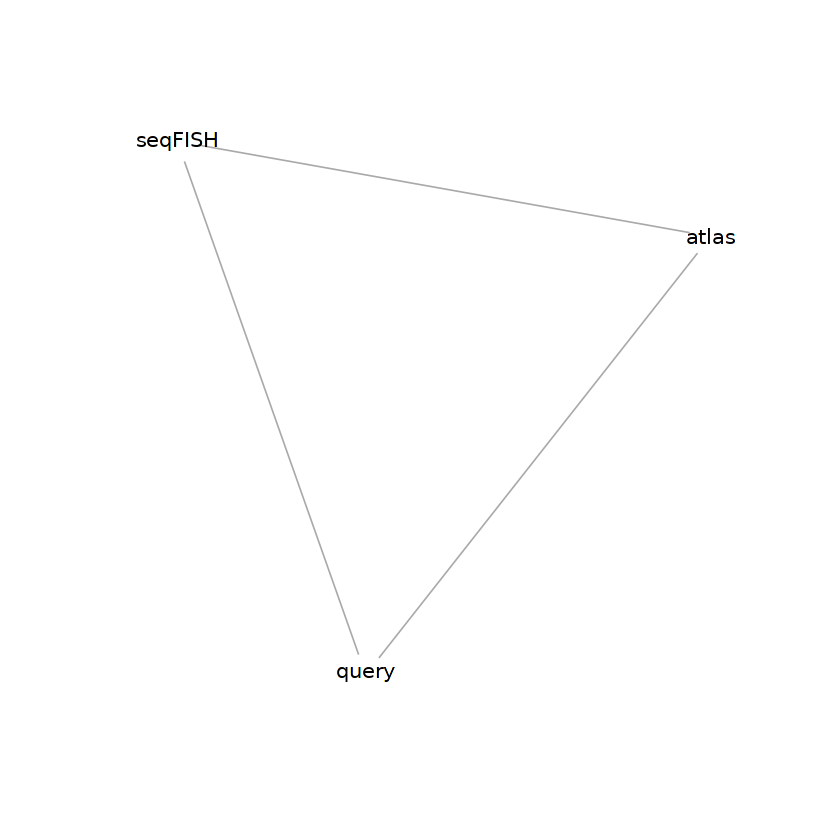

In [11]:
## Run STABMAP
StabMAP = stabMap(
  assay_list = list(
    atlas = atlas_logcounts_ss,
    seqFISH = seqFISH_logcounts_ss,
    query = query_logcounts_ss
  ),
  reference_scores_list = list(
    "atlas" = atlas_PC[,1:n],
    "seqFISH" = seqFISH_PC[,1:n],
    "query" = query_PC[,1:n]
  ),
  ncomponentsReference = list(
    "atlas" = ncol(atlas_PC[,1:n]),
    "seqFISH" = ncol(seqFISH_PC[,1:n]),
    "query" = ncol(query_PC[,1:n])
  ),
  projectAll = TRUE,
  maxFeatures = 5716
)

# reweight embedding for equal contribution
StabMAP_reweighted = reWeightEmbedding(StabMAP)

In [12]:
# Run Reduced MNN to Remove Batch Effects
# First set the batches for some horizontal data integration for batch effects
batchfactor = setNames(rep(NA, nrow(StabMAP_reweighted)),
                           rownames(StabMAP_reweighted))

batchfactor[colnames(seqFISH_logcounts_ss)] <- "seqFISH"
batchfactor[colnames(query_logcounts_ss)] <- "query"
batchfactor[colnames(atlas_logcounts_ss)] <- "atlas"

# Now run reducedMNN on the StabMAP Output
StabMAP_reweighted_MNNcorrected <- reducedMNN_batchFactor(StabMAP_reweighted,
                                           batch = batchfactor,
                                           k = 10)

## Save the StabMAP Outputs

In [13]:
saveRDS(StabMAP_reweighted_MNNcorrected, "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/StabMAP_gastruloids.Rds")

# Pipeline #2 (Transfer Information to Query Cells from Spatiotemporal Atlas)

## Generate a Combined Seurat Object with All Datasets and Add MetaData

In [14]:
### Create a Seurat Object that Contains the query, scRNA and seqFISH cells ###

# Create a combined seurat object, first make individual seurat objects for the datasets, and then merge them to make one combined object
seqFISH_seurat <- CreateSeuratObject(counts = seqFISH_logcounts, project = "seqFISH")
atlas_seurat <- CreateSeuratObject(counts = atlas_logcounts, project = "atlas")
query_seurat <- CreateSeuratObject(counts = query_logcounts, project = "query")

# Create a combined Seurat Object
combined_seurat <- merge(atlas_seurat, y = c(seqFISH_seurat, query_seurat))
seurat_combined <- combined_seurat

# Add the StabMAP coordinates to the Seurat Object 
StabMAP_coord <- CreateDimReducObject(embeddings = StabMAP_reweighted_MNNcorrected, key = "StabMAP")
seurat_combined[["StabMAP"]] <- StabMAP_coord

# Add column in metadata that includes dataset information
seurat_combined@meta.data$dataset <- seurat_combined@meta.data$orig.ident
seurat_combined@meta.data$dataset <- recode(seurat_combined@meta.data$dataset, 
                                            "cell" = "scRNA",
                                            "embryo4" = "seqFISH",
                                            "embryo5" = "seqFISH",
                                            "embryo6" = "seqFISH",
                                            "embryo7" = "seqFISH",
                                            "embryo1" = "seqFISH",
                                            "embryo2" = "seqFISH",
                                            "embryo3" = "seqFISH",
                                            "ext" = "scRNA",
                                            "GAS" = "query")

seurat_combined

Warning message:
“No assay specified, setting assay as RNA by default.”
Warning message:
“Keys should be one or more alphanumeric characters followed by an underscore, setting key from StabMAP to StabMAP_”
Warning message:
“All keys should be one or more alphanumeric characters followed by an underscore '_', setting key to StabMAP_”


An object of class Seurat 
30152 features across 219243 samples within 1 assay 
Active assay: RNA (30152 features, 0 variable features)
 1 dimensional reduction calculated: StabMAP

In [15]:
### Add the seqFISH and scRNA Meta Data to the Seurat Object###
#set location for the refined annotations from Harland et al. and load them in 
io$refined_annotations = file.path(io$main, "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/1B_FINAL_REFINED_ANNOTATIONS_REVISIONS_POST_REVISION.Rds")
refined_annotations = readRDS(io$refined_annotations)

# subset the metadata to only include columns you want to add to the combined seurat object
refined_annotations_ss <- subset(refined_annotations, select = c(AP, DV, joint_clusters_pass_QC, refined_annotation, stage, stage_transfer))

# add the metadata to the combined seurat object 
seurat_combined <- AddMetaData(seurat_combined, metadata = refined_annotations_ss)

# add a cell_ID column
seurat_combined@meta.data$cell_ID <- row.names(seurat_combined@meta.data)

## Identify seqFISH/scRNA cell that is closest to each query cell to project query cells into spatiotemporal UMAP and seqFISH embryos

In [16]:
# Function to transfer labels from reference datasets to query datasets
transfer_labels <- function(query_datasets, reference_datasets, merged_seurat_object, 
                            label_to_transfer, k_values = 5, output_colname = "label_transfer") {
  
  # Ensure StabMAP reduction exists
  if (!"StabMAP" %in% names(merged_seurat_object@reductions)) {
    stop("Error: StabMAP reduction is missing in merged_seurat_object@reductions")
  }
  
  # Extract StabMAP embeddings
  variable <- merged_seurat_object@reductions$StabMAP@cell.embeddings
  
  # Ensure label_to_transfer exists in metadata
  if (!(label_to_transfer %in% colnames(reference_datasets@meta.data))) {
    stop(paste("Error: Column", label_to_transfer, "not found in reference_datasets metadata"))
  }
  
  # Extract labels from reference dataset metadata
  celltype <- setNames(as.character(reference_datasets@meta.data[[label_to_transfer]]), 
                       rownames(reference_datasets@meta.data))
  
  # Transfer labels using embedding KNN
  celltype_labels <- embeddingKNN(
    coords = variable,
    labels = celltype,
    type = "uniform_fixed",
    k_values = k_values,
    verbose = TRUE
  )

  # **Ensure only predicted labels are retained**
  if ("predicted_labels" %in% colnames(celltype_labels)) {
    celltype_labels <- subset(celltype_labels, select = predicted_labels)
  } else {
    stop("Error: 'predicted_labels' column not found in celltype_labels")
  }

  # Rename predicted labels column
  colnames(celltype_labels) <- output_colname
  
  return(celltype_labels)
}

In [17]:
# Identify nearest scRNA/seqFISH cell to the query dataset
nearest_cell <- transfer_labels(
  query_datasets = seurat_combined[, seurat_combined$dataset == "query"], 
  reference_datasets = seurat_combined[, seurat_combined$dataset %in% c("scRNA", "seqFISH")], 
  merged_seurat_object = seurat_combined, 
  label_to_transfer = "cell_ID", 
  k_values = 1, 
  output_colname = "nearest_cell"
)

# Identify nearest seqFISH cell to the query dataset
nearest_seqFISH_cell <- transfer_labels(
  query_datasets = seurat_combined[, seurat_combined$dataset == "query"], 
  reference_datasets = seurat_combined[, seurat_combined$dataset %in% c("seqFISH")], 
  merged_seurat_object = seurat_combined[, seurat_combined$dataset %in% c("seqFISH", "query")], 
  label_to_transfer = "cell_ID", 
  k_values = 1, 
  output_colname = "nearest_cell_seqFISH"
)

Loading required package: BiocNeighbors

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


The following object is masked from ‘package:S4Vectors’:

    expand




In [18]:
# Transfer Harland et al Cell Type Labels to Query Cells
Harland_labels <- transfer_labels(
  query_datasets = seurat_combined[, seurat_combined$dataset == "query"], 
  reference_datasets = seurat_combined[, seurat_combined$dataset %in% c("scRNA", "seqFISH")], 
  merged_seurat_object = seurat_combined, 
  label_to_transfer = "refined_annotation", 
  k_values = 10, 
  output_colname = "refined_annotation"
)

# Transfer Spatial Integrity Metric to Query Cells
Spatial_Integrity_labels <- transfer_labels(
  query_datasets = seurat_combined[, seurat_combined$dataset == "query"], 
  reference_datasets = seurat_combined[, seurat_combined$dataset %in% c("scRNA", "seqFISH")], 
  merged_seurat_object = seurat_combined, 
  label_to_transfer = "joint_clusters_pass_QC", 
  k_values = 10, 
  output_colname = "joint_clusters_pass_QC"
)

## Generate a Seurat Object that Contains Only the Query Cells, then Add All Transferred Information

In [19]:
# Extract the meta.data part from query_datasets and add cell_ID column
query_object <- seurat_combined[, seurat_combined$dataset == "query"]

# Add Identify of nearest scRNA/seqFISH cell to the query dataset
query_object <- AddMetaData(query_object, metadata = nearest_cell)

# Add Identify of nearest seqFISH cell to the query dataset
query_object <- AddMetaData(query_object, metadata = nearest_seqFISH_cell)

# Add Harland et al Cell Type Labels to Query Cells
query_object <- AddMetaData(query_object, metadata = Harland_labels)

# Add Spatial Integrity Metric to Query Cells
query_object <- AddMetaData(query_object, metadata = Spatial_Integrity_labels)

## Extract the Spatiotemporal UMAP Coordinates for the Query Cells (Using the Nearest Neighbour)

In [20]:
### Extract the UMAP Coordinates for the Query Cells Based on the Nearest Neighbour from the seqFISH/scRNA Datasets ###

# Ensure nearest_cell column exists in refined_annotations
refined_annotations$nearest_cell <- row.names(refined_annotations)

# Merge the two data frames on the nearest_cell column, and select only necessary columns
merged_data <- merge(query_object@meta.data, 
                     refined_annotations[, c("nearest_cell", "UMAP_1", "UMAP_2")], 
                     by = "nearest_cell", 
                     all.x = TRUE)

# Restore row names and extract UMAP coordinates
row.names(merged_data) <- merged_data$cell_ID
query_UMAP_coordinates <- merged_data[, c("UMAP_1", "UMAP_2")]

# Add UMAP Coordinates to Query Cells MetaData
query_object <- AddMetaData(query_object, metadata = query_UMAP_coordinates)

## Extract the Spatial Coordinates and the Embryo ID for the Query Cells (Using the Nearest Neighbour)

In [21]:
# Ensure nearest_cell column exists in refined_annotations
seqFISH@meta.data$nearest_cell_seqFISH <- row.names(seqFISH@meta.data)

# Merge the two data frames on the nearest_cell column, and select only necessary columns
merged_data <- merge(query_object@meta.data, 
                     seqFISH@meta.data[, c("nearest_cell_seqFISH", "dim1", "dim2", "embryo")], 
                     by = "nearest_cell_seqFISH", 
                     all.x = TRUE)

# Restore row names and extract UMAP coordinates
row.names(merged_data) <- merged_data$cell_ID
query_spatial_coordinates <- merged_data[, c("dim1", "dim2", "embryo")]

# Add Spatial Coordinates to Query Cells MetaData
query_object <- AddMetaData(query_object, metadata = query_spatial_coordinates)

## Impute AP and DV Values (seqFISH --> query)

In [22]:
impute_APDV <- function(seurat_combined, query_label = "query", reference_label = "seqFISH", neighbours = 10) {
  # Subset query and reference datasets
  query_datasets <- seurat_combined[, seurat_combined$dataset == query_label]
  reference_datasets <- seurat_combined[, seurat_combined$dataset == reference_label]

  # Extract StabMAP embeddings and metadata
  variable <- seurat_combined@reductions$StabMAP@cell.embeddings
  reference_AP_DV <- t(reference_datasets@meta.data[, c("AP", "DV")])

  # Convert sparse matrices to dense matrices
  assay_list_dense <- lapply(
    list(
      reference_AP_DV = reference_AP_DV,
      query_AP_DV = as.matrix(query_datasets@assays$RNA@counts[1:2, ])
    ),
    as.matrix
  )

  # Perform imputation
  imputed_APDV <- imputeEmbedding(
    assay_list_dense,
    variable,
    reference = colnames(reference_datasets),
    query = colnames(query_datasets),
    neighbours = neighbours,
    fun = mean
  )

  # Combine imputed and reference data
  APDV <- as.data.frame(rbind(t(imputed_APDV$reference_AP_DV), t(reference_AP_DV)))

  # Return the imputed APDV data
  return(APDV)
}

# Example function call:
APDV_result <- impute_APDV(seurat_combined)

In [23]:
# Add Spatial Coordinates to Query Cells MetaData
query_object <- AddMetaData(query_object, metadata = APDV_result)

## Make a New DataFrame to Save with All The MetaData for the Query Cells

In [24]:
# Extract relevant metadata from original and new objects
query_original_meta_ss <- gastruloids@meta.data %>% 
  select(celltype, stage) %>% 
  mutate(cell_ID = rownames(.))

query_new_meta_ss <- query_object@meta.data %>% 
  select(AP, DV, joint_clusters_pass_QC, refined_annotation, UMAP_1, UMAP_2, dim1, dim2, embryo, nearest_cell, nearest_cell_seqFISH) %>% 
  mutate(cell_ID = rownames(.))

# Merge both metadata frames on cell_ID
merged_query_meta <- full_join(query_original_meta_ss, query_new_meta_ss, by = "cell_ID")

In [25]:
merged_query_meta$dataset <- "query"

## Save the Transferred Labels

In [26]:
saveRDS(merged_query_meta, "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/merged_query_meta.Rds")

## Plot Query in Spatiotemporal UMAP

In [27]:
options(repr.plot.width=30, repr.plot.height=10)
# variables
df <- merged_query_meta
df_2 <- refined_annotations
embryo_to_plot <- "embryo6"
point_size <- 0.4

# plot day 
p1 <- ggplot(data=df, aes(UMAP_1, UMAP_2, col=stage)) + 
  geom_point(data=df_2, aes(UMAP_1, UMAP_2), col='grey85', size = 0.2) + 
  geom_point(size = point_size) +
  #scale_color_manual(values=ab_initio_identity_colors) + 
  theme_void() + 
  theme(legend.position='none') + coord_fixed()

# cell type gastruloids
p2 <- ggplot(data=df, aes(UMAP_1, UMAP_2, col=celltype)) + 
  geom_point(data=df_2, aes(UMAP_1, UMAP_2), col='grey85', size = 0.2) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Rossi_colors) + 
  theme_void() + 
  theme(legend.position='none') + coord_fixed()

# spatio temporal cell type
p3 <- ggplot(data=df, aes(UMAP_1, UMAP_2, col=refined_annotation)) + 
  geom_point(data=df_2, aes(UMAP_1, UMAP_2), col='grey85', size = 0.2) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Harland_colors) + 
  theme_void() + 
  theme(legend.position='none') + coord_fixed()

# oint cluster QC
p4 <- ggplot(data=df, aes(UMAP_1, UMAP_2, col=joint_clusters_pass_QC)) + 
  geom_point(data=df_2, aes(UMAP_1, UMAP_2), col='grey85', size = 0.2) + 
  geom_point(size = point_size) +
  #scale_color_manual(values=refined_annotation_colors) + 
  theme_void() + 
  theme(legend.position='none') + coord_fixed()

# AP
p5 <- ggplot(data=df[df$joint_clusters_pass_QC == TRUE,], aes(UMAP_1, UMAP_2, col=AP)) + 
  geom_point(data=df_2, aes(UMAP_1, UMAP_2), col='grey85', size = 0.2) + 
  geom_point(size = point_size) +
  #scale_color_manual(values=refined_annotation_colors) + 
  scale_color_gradient(low = "blue", high = "red", limits = c(0, 100)) + 
  theme_void() + 
  theme(legend.position='none') + coord_fixed()

# DV
p6 <- ggplot(data=df[df$joint_clusters_pass_QC == TRUE,], aes(UMAP_1, UMAP_2, col=DV)) + 
  geom_point(data=df_2, aes(UMAP_1, UMAP_2), col='grey85', size = 0.2) + 
  geom_point(size = point_size) +
  #scale_color_manual(values=refined_annotation_colors) + 
  scale_color_gradient(low = "purple", high = "orange", limits = c(0, 100)) + 
  theme_void() + 
  theme(legend.position='none') + coord_fixed()

#### Generating Combined Panels

png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/figures/gastruloid_projection_umaps.pdf

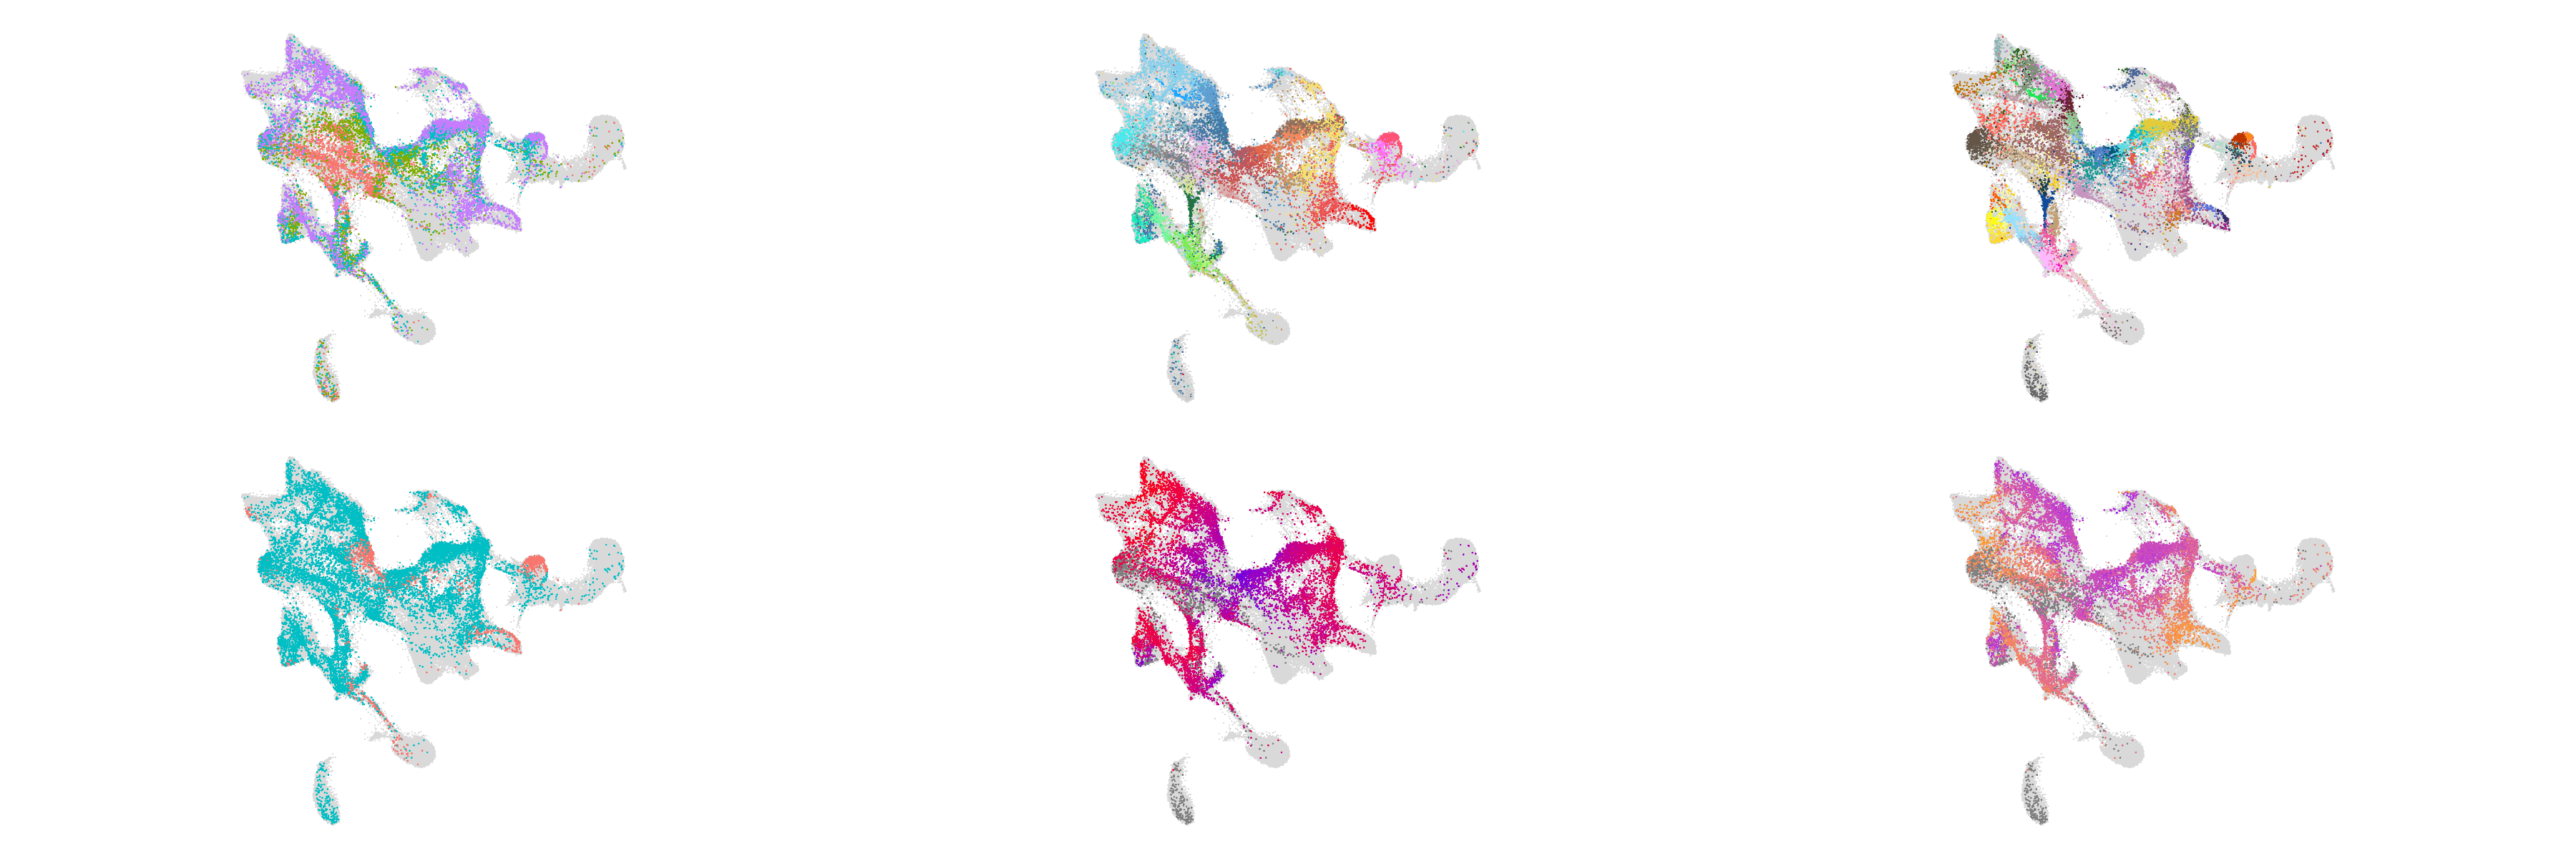

In [28]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 7, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
p5_raster <- rasterize_plot(p5)
p6_raster <- rasterize_plot(p6)
#p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)
#p9_raster <- rasterize_plot(p9)
#p10_raster <- rasterize_plot(p10)
#p11_raster <- rasterize_plot(p11)
#p12_raster <- rasterize_plot(p12)
#p13_raster <- rasterize_plot(p13)
#p14_raster <- rasterize_plot(p14)
#p15_raster <- rasterize_plot(p15)
#p16_raster <- rasterize_plot(p16)
#p17_raster <- rasterize_plot(p17)
#p18_raster <- rasterize_plot(p18)
#p19_raster <- rasterize_plot(p19)
#p20_raster <- rasterize_plot(p20)


# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
#p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()
#p9 <- ggplot() + annotation_custom(p9_raster) + theme_void()
##p10 <- ggplot() + annotation_custom(p10_raster) + theme_void()
#p11 <- ggplot() + annotation_custom(p11_raster) + theme_void()
#p12 <- ggplot() + annotation_custom(p12_raster) + theme_void()
#p13 <- ggplot() + annotation_custom(p13_raster) + theme_void()
#p14 <- ggplot() + annotation_custom(p14_raster) + theme_void()
#p15 <- ggplot() + annotation_custom(p15_raster) + theme_void()
#p16 <- ggplot() + annotation_custom(p16_raster) + theme_void()
#p17 <- ggplot() + annotation_custom(p17_raster) + theme_void()
#p18 <- ggplot() + annotation_custom(p18_raster) + theme_void()
#p19 <- ggplot() + annotation_custom(p19_raster) + theme_void()
#p20 <- ggplot() + annotation_custom(p20_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,p5,p6,
  ncol = 3, nrow = 2) +
  plot_layout(
    widths = c(1, 1, 1),
    heights = c(1,1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/figures/gastruloid_projection_umaps.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, width = (150/4), height = (200/4)*1/5)
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

## Projection of Gastruloids into Spatial Context

In [29]:
# load in the seqFISH spatial coordinates
seqFISH_PREQC <- readRDS(io$seqFISH_preQC)

In [30]:
options(repr.plot.width=30, repr.plot.height=10)

# variables
df <- merged_query_meta
df_2 <- seqFISH_PREQC@meta.data
embryo_to_plot <- c("embryo6")
point_size <- 1.5

# plot gastruloids projected into space 
p1 <- ggplot(data=df[df$embryo %in% embryo_to_plot & df$joint_clusters_pass_QC == TRUE,], aes(dim1, dim2, col=refined_annotation)) + 
  geom_point(data=df_2[df_2$embryo %in% embryo_to_plot,], aes(dim1, dim2), col='grey85', size = 1) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Harland_colors) + 
  theme_void() + 
  facet_wrap (~embryo) +
  theme(legend.position='none', strip.text = element_blank()) + coord_fixed()

embryo_to_plot <- c("embryo7")
p2 <- ggplot(data=df[df$embryo %in% embryo_to_plot & df$joint_clusters_pass_QC == TRUE,], aes(dim1, dim2, col=refined_annotation)) + 
  geom_point(data=df_2[df_2$embryo %in% embryo_to_plot,], aes(dim1, dim2), col='grey85', size = 1) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Harland_colors) + 
  theme_void() + 
  facet_wrap (~embryo) +
  theme(legend.position='none', strip.text = element_blank()) + coord_fixed()


embryo_to_plot <- c("embryo4")
p3 <- ggplot(data=df[df$embryo %in% embryo_to_plot & df$joint_clusters_pass_QC == TRUE,], aes(dim1, dim2, col=refined_annotation)) + 
  geom_point(data=df_2[df_2$embryo %in% embryo_to_plot,], aes(dim1, dim2), col='grey85', size = 1) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Harland_colors) + 
  theme_void() + 
  facet_wrap (~embryo) +
  theme(legend.position='none', strip.text = element_blank()) + coord_fixed()

embryo_to_plot <- c("embryo5")
p4 <- ggplot(data=df[df$embryo %in% embryo_to_plot & df$joint_clusters_pass_QC == TRUE,], aes(dim1, dim2, col=refined_annotation)) + 
  geom_point(data=df_2[df_2$embryo %in% embryo_to_plot,], aes(dim1, dim2), col='grey85', size = 1) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Harland_colors) + 
  theme_void() + 
  facet_wrap (~embryo) +
  theme(legend.position='none', strip.text = element_blank()) + coord_fixed()

embryo_to_plot <- c("embryo1")
p5 <- ggplot(data=df[df$embryo %in% embryo_to_plot & df$joint_clusters_pass_QC == TRUE,], aes(dim1, dim2, col=refined_annotation)) + 
  geom_point(data=df_2[df_2$embryo %in% embryo_to_plot,], aes(dim1, dim2), col='grey85', size = 1) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Harland_colors) + 
  theme_void() + 
  facet_wrap (~embryo) +
  theme(legend.position='none', strip.text = element_blank()) + coord_fixed()

embryo_to_plot <- c("embryo2")
p6 <- ggplot(data=df[df$embryo %in% embryo_to_plot & df$joint_clusters_pass_QC == TRUE,], aes(dim1, dim2, col=refined_annotation)) + 
  geom_point(data=df_2[df_2$embryo %in% embryo_to_plot,], aes(dim1, dim2), col='grey85', size = 1) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Harland_colors) + 
  theme_void() + 
  facet_wrap (~embryo) +
  theme(legend.position='none', strip.text = element_blank()) + coord_fixed()

embryo_to_plot <- c("embryo3")
p7 <- ggplot(data=df[df$embryo %in% embryo_to_plot & df$joint_clusters_pass_QC == TRUE,], aes(dim1, dim2, col=refined_annotation)) + 
  geom_point(data=df_2[df_2$embryo %in% embryo_to_plot,], aes(dim1, dim2), col='grey85', size = 1) + 
  geom_point(size = point_size) +
  scale_color_manual(values=Harland_colors) + 
  theme_void() + 
  facet_wrap (~embryo) +
  theme(legend.position='none', strip.text = element_blank()) + coord_fixed()

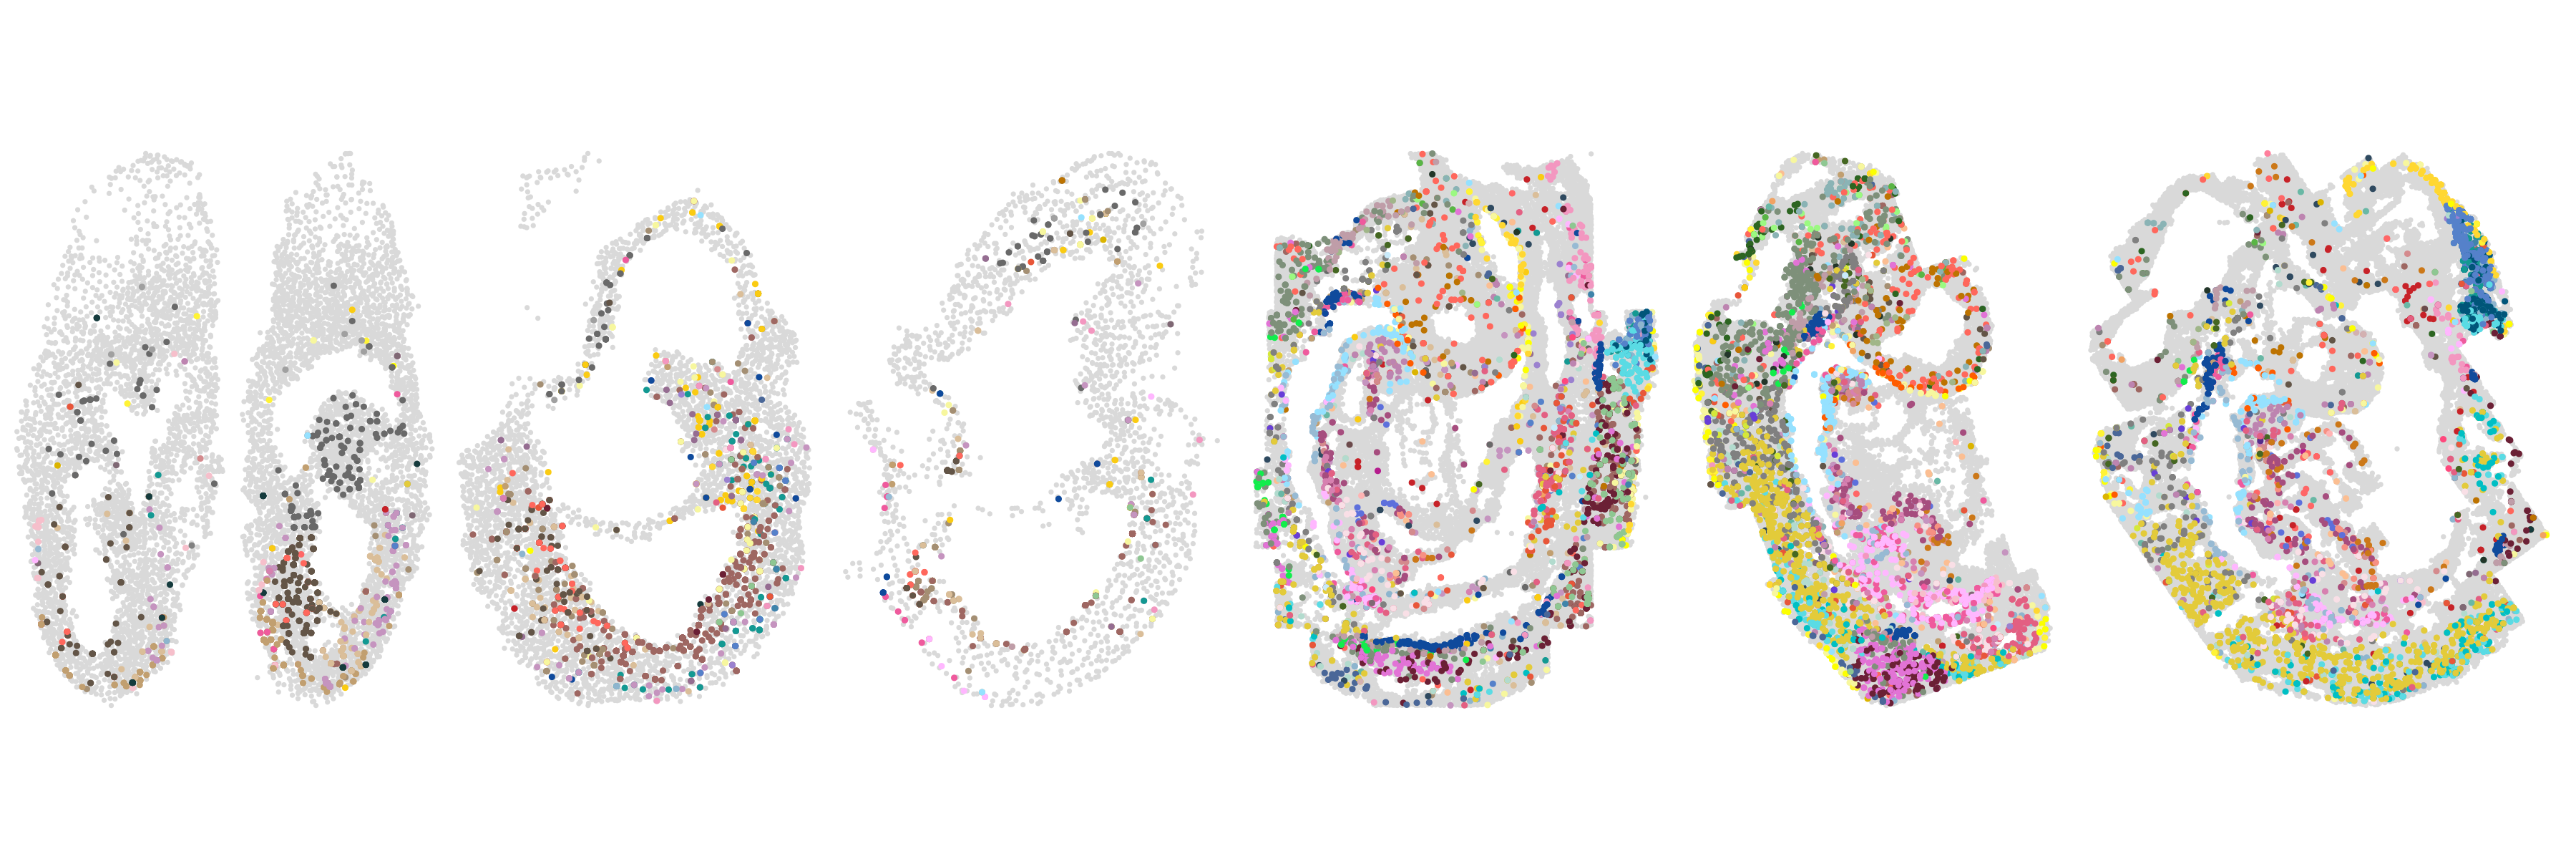

In [31]:
p1 | p2 | p3 | p4 | p5 | p6 | p7

png 
  2

Plot saved to projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/figures/gastruloid_projection_spatial.pdf

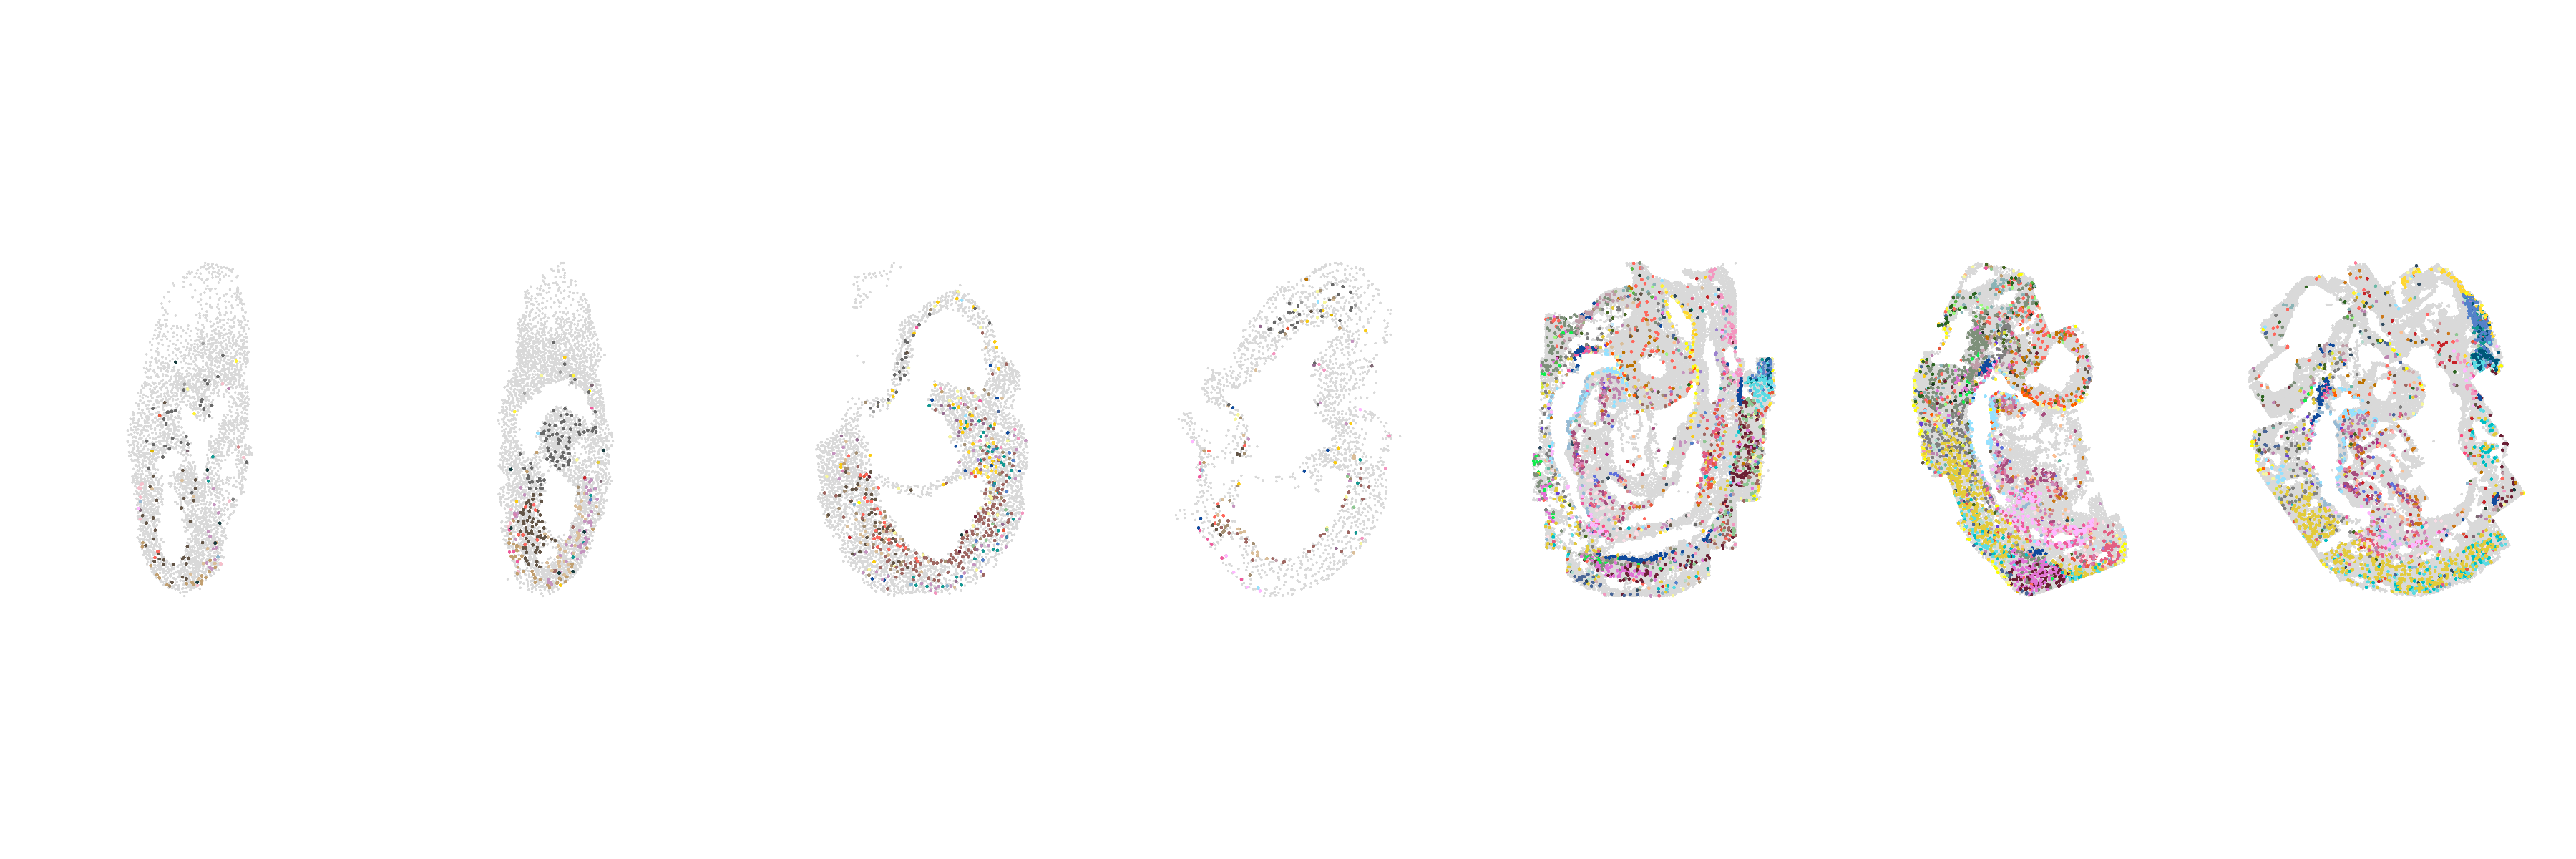

In [32]:
# Function to rasterize specific plots
rasterize_plot <- function(plot, dpi = 300) {
  temp_file <- tempfile(fileext = ".png")
  png(filename = temp_file, width = 7, height = 7, units = "in", res = dpi)
  print(plot)
  dev.off()
  img <- readPNG(temp_file)
  rasterGrob(img)
}

# Create plots
p1_raster <- rasterize_plot(p1)
p2_raster <- rasterize_plot(p2)
p3_raster <- rasterize_plot(p3)
p4_raster <- rasterize_plot(p4)
p5_raster <- rasterize_plot(p5)
p6_raster <- rasterize_plot(p6)
p7_raster <- rasterize_plot(p7)
#p8_raster <- rasterize_plot(p8)
#p9_raster <- rasterize_plot(p9)
#p10_raster <- rasterize_plot(p10)
#p11_raster <- rasterize_plot(p11)
#p12_raster <- rasterize_plot(p12)
#p13_raster <- rasterize_plot(p13)
#p14_raster <- rasterize_plot(p14)
#p15_raster <- rasterize_plot(p15)
#p16_raster <- rasterize_plot(p16)
#p17_raster <- rasterize_plot(p17)
#p18_raster <- rasterize_plot(p18)
#p19_raster <- rasterize_plot(p19)
#p20_raster <- rasterize_plot(p20)


# Wrapping rasterized plots in a ggplot
p1 <- ggplot() + annotation_custom(p1_raster) + theme_void()
p2 <- ggplot() + annotation_custom(p2_raster) + theme_void()
p3 <- ggplot() + annotation_custom(p3_raster) + theme_void()
p4 <- ggplot() + annotation_custom(p4_raster) + theme_void()
p5 <- ggplot() + annotation_custom(p5_raster) + theme_void()
p6 <- ggplot() + annotation_custom(p6_raster) + theme_void()
p7 <- ggplot() + annotation_custom(p7_raster) + theme_void()
#p8 <- ggplot() + annotation_custom(p8_raster) + theme_void()
#p9 <- ggplot() + annotation_custom(p9_raster) + theme_void()
##p10 <- ggplot() + annotation_custom(p10_raster) + theme_void()
#p11 <- ggplot() + annotation_custom(p11_raster) + theme_void()
#p12 <- ggplot() + annotation_custom(p12_raster) + theme_void()
#p13 <- ggplot() + annotation_custom(p13_raster) + theme_void()
#p14 <- ggplot() + annotation_custom(p14_raster) + theme_void()
#p15 <- ggplot() + annotation_custom(p15_raster) + theme_void()
#p16 <- ggplot() + annotation_custom(p16_raster) + theme_void()
#p17 <- ggplot() + annotation_custom(p17_raster) + theme_void()
#p18 <- ggplot() + annotation_custom(p18_raster) + theme_void()
#p19 <- ggplot() + annotation_custom(p19_raster) + theme_void()
#p20 <- ggplot() + annotation_custom(p20_raster) + theme_void()


# Create spacers
spacer <- plot_spacer()

# Combine plots using wrap_plots and adjust layout
combined_plot <- wrap_plots(
p1, p2, p3, p4,p5,p6,p7,
  ncol = 7, nrow = 1) +
  plot_layout(
    widths = c(1, 1, 1, 1, 1, 1, 1),
    heights = c(1)
  )

# Specify the file path where you want to save the PDF file
file_path <- "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/figures/gastruloid_projection_spatial.pdf"

# Save the combined plot as a PDF file with rasterized subplots
Cairo::CairoPDF(file = file_path, width = (150/4), height = (200/4)*1/5)
print(combined_plot)
dev.off()

# Print a message to confirm the plot has been saved
cat("Plot saved to", file_path)

# Pipeline #3 (Compare Cell Type Composition of Gastruloids versus scRNA)

In [33]:
# Ensure rownames are set to cell_ID for both data frames
rownames(refined_annotations) <- refined_annotations$cell_ID
rownames(merged_query_meta) <- merged_query_meta$cell_ID

# Select relevant columns from each data frame
refined_subset <- refined_annotations[, c("AP", "DV", "dataset", "refined_annotation", "joint_clusters_pass_QC")]
merged_subset <- merged_query_meta[, c("AP", "DV", "dataset", "refined_annotation", "joint_clusters_pass_QC")]

# Combine the two data frames by binding rows
superset_data <- rbind(refined_subset, merged_subset)

# Ensure dataset column is a factor with levels set for ordering
superset_data$dataset <- factor(superset_data$dataset, levels = c("query", "scRNA"))

# set colours for the plots
annotation_colors <- c("scRNA" = "#BD2E34", "query" = "#76ACC8")

# list of cell types present in different germ layers
mesoderm_layer
ectoderm_layer
endoderm_layer
somitic_layer

[1] "Pharyngeal mesoderm"                          
 [2] "Cardiopharyngeal progenitors"                 
 [3] "Cardiopharyngeal progenitors SHF"             
 [4] "Anterior cardiopharyngeal progenitors"        
 [5] "Cardiopharyngeal progenitors FHF"             
 [6] "Cardiomyocytes FHF 1"                         
 [7] "Cardiomyocytes FHF 2"                         
 [8] "Cardiomyocytes SHF 1"                         
 [9] "Cardiomyocytes SHF 2"                         
[10] "Epicardium"                                   
[11] "Endocardium"                                  
[12] "Intermediate mesoderm"                        
[13] "ExE mesoderm and Anterior LPM"                
[14] "ExE mesoderm and Posterior LPM"               
[15] "Anterior LPM"                                 
[16] "Limb mesoderm"                                
[17] "Kidney primordium"                            
[18] "Allantois"                                    
[19] "Paraxial mesoderm"                            
[20] "Presomitic mesoderm"                          
[21] "Somitic mesoderm"                             
[22] "Anterior somitic tissues"                     
[23] "Posterior somitic tissues"                    
[24] "Endotome"                                     
[25] "Dermomyotome"                                 
[26] "Cranial mesoderm and anterior somitic tissue" 
[27] "Sclerotome"                                   
[28] "Embryo proper mesothelium"                    
[29] "Mesenchyme"                                   
[30] "NMPs"                                         
[31] "Cranial mesoderm"                             
[32] "Frontonasal mesenchyme"                       
[33] "Allantois endothelium"                        
[34] "Embryo proper endothelium #1"                 
[35] "Embryo proper endothelium #2"                 
[36] "Endocardium #1"                               
[37] "Endocardium #2"                               
[38] "Haematoendothelial progenitors"               
[39] "Blood progenitors"                            
[40] "Erythroid"                                    
[41] "Chorioallantoic-derived erythroid progenitors"
[42] "EMP"                                          
[43] "MEP"

[1] "Amniotic ectoderm"                  "Surface ectoderm"                  
 [3] "Epidermis"                          "Placodal ectoderm"                 
 [5] "Otic placode"                       "Otic neural progenitors"           
 [7] "Limb ectoderm"                      "Migratory neural crest"            
 [9] "Branchial arch neural crest"        "Ectoderm"                          
[11] "Non-neural ectoderm"                "Neural tube"                       
[13] "Optic vesicle"                      "Early dorsal forebrain progenitors"
[15] "Late dorsal forebrain progenitors"  "Ventral forebrain progenitors"     
[17] "Midbrain progenitors"               "Dorsal midbrain neurons"           
[19] "Midbrain/Hindbrain boundary"        "Dorsal hindbrain progenitors"      
[21] "Hindbrain floor plate"              "Hindbrain neural progenitors"      
[23] "Ventral hindbrain progenitors"      "Dorsal spinal cord progenitors"    
[25] "Spinal cord progenitors"            "Ventral neural tube"

[1] "Parietal endoderm"         "ExE endoderm"             
 [3] "Visceral endoderm"         "Anterior Primitive Streak"
 [5] "Gut tube"                  "Foregut"                  
 [7] "Midgut"                    "Hindgut"                  
 [9] "Pharyngeal endoderm"       "Thyroid primordium"       
[11] "Node"                      "Notochord"

[1] "Anterior somitic tissues"  "Posterior somitic tissues"
[3] "Dermomyotome"              "Sclerotome"               
[5] "Endotome"                  "Somitic mesoderm"

In [34]:
# Generate data.frame subsets with cells that passed join_cluster QC
df_mesoderm <- filter(superset_data, joint_clusters_pass_QC == TRUE & refined_annotation %in% mesoderm_layer & dataset %in% c("query", "scRNA"))
df_endoderm <- filter(superset_data, joint_clusters_pass_QC == TRUE & refined_annotation %in% endoderm_layer & dataset %in% c("query", "scRNA"))
df_ectoderm <- filter(superset_data, joint_clusters_pass_QC == TRUE & refined_annotation %in% ectoderm_layer & dataset %in% c("query", "scRNA"))
df_somitic <- filter(superset_data, joint_clusters_pass_QC == TRUE & refined_annotation %in% somitic_layer & dataset %in% c("query", "scRNA"))

## Generate Germ Layer Comparison Plots

KS Test for Mesoderm: D = 0.261, p-value = 0.00e+00

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”
KS Test for Endoderm: D = 0.126, p-value = 0.00e+00

KS Test for Ectoderm: D = 0.179, p-value = 0.00e+00

Picking joint bandwidth of 2.42

Warning message:
“Removed 65 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Picking joint bandwidth of 2.59

Warning message:
“Removed 57 rows containing missing values (`position_stack()`).”


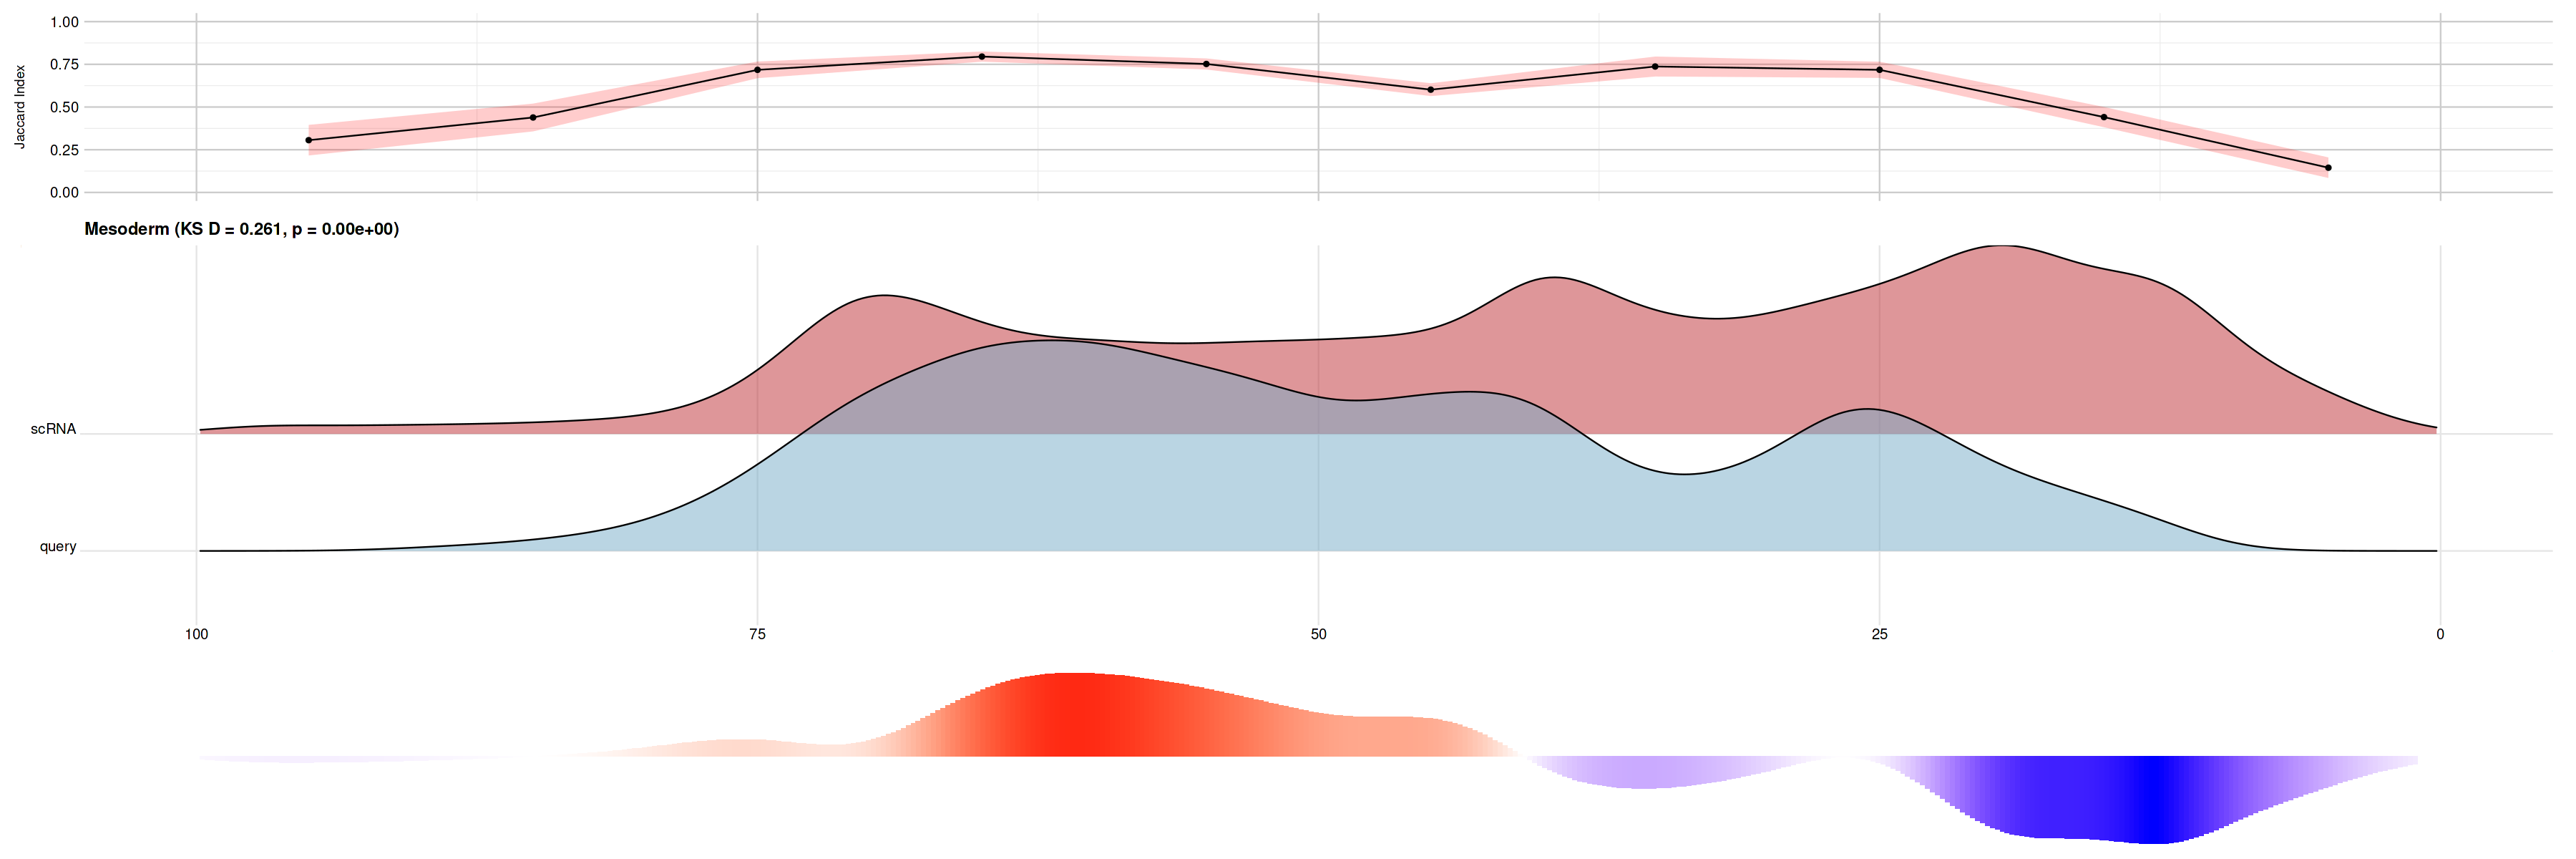

Picking joint bandwidth of 2.89

Warning message:
“Removed 50 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”


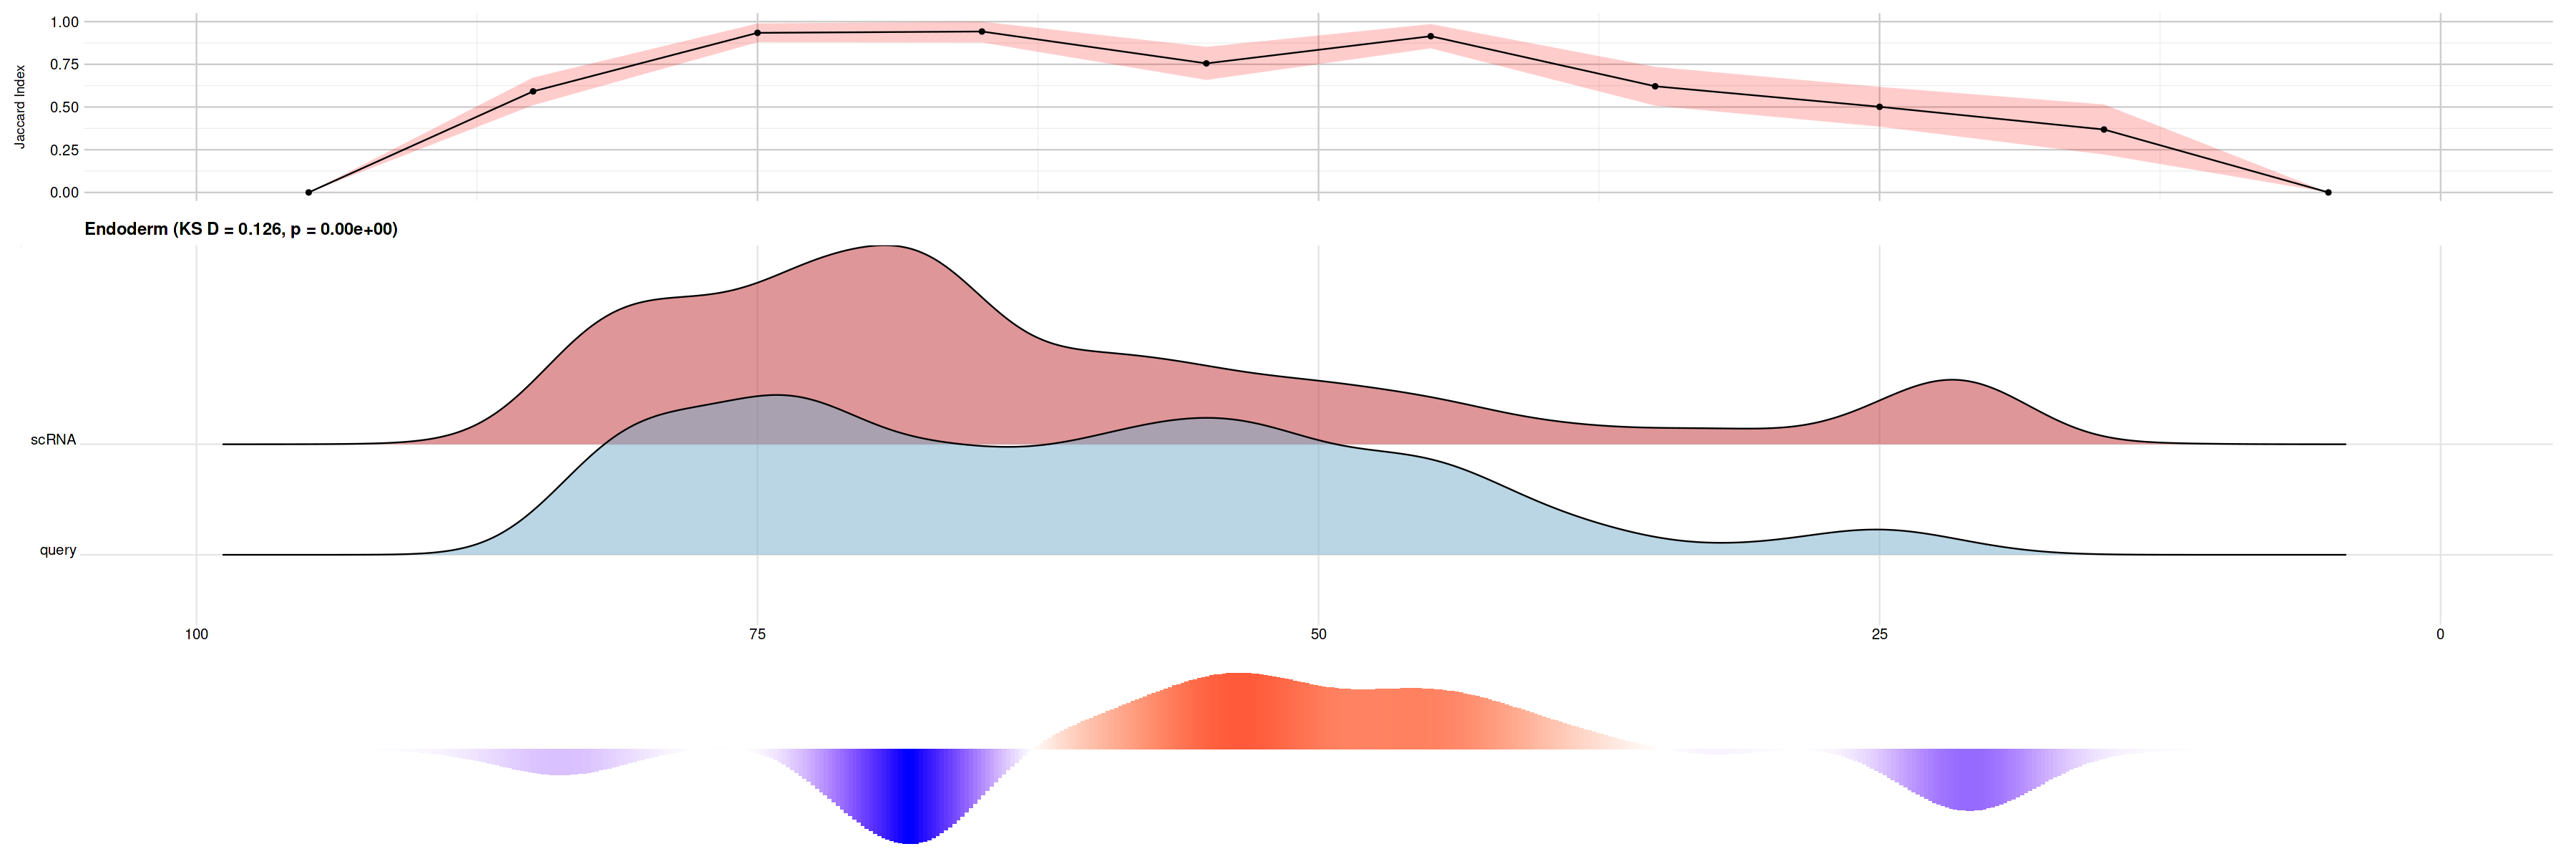

Picking joint bandwidth of 2.42

Warning message:
“Removed 65 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”
Picking joint bandwidth of 2.59

Warning message:
“Removed 57 rows containing missing values (`position_stack()`).”
Picking joint bandwidth of 2.89

Warning message:
“Removed 50 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_col()`).”


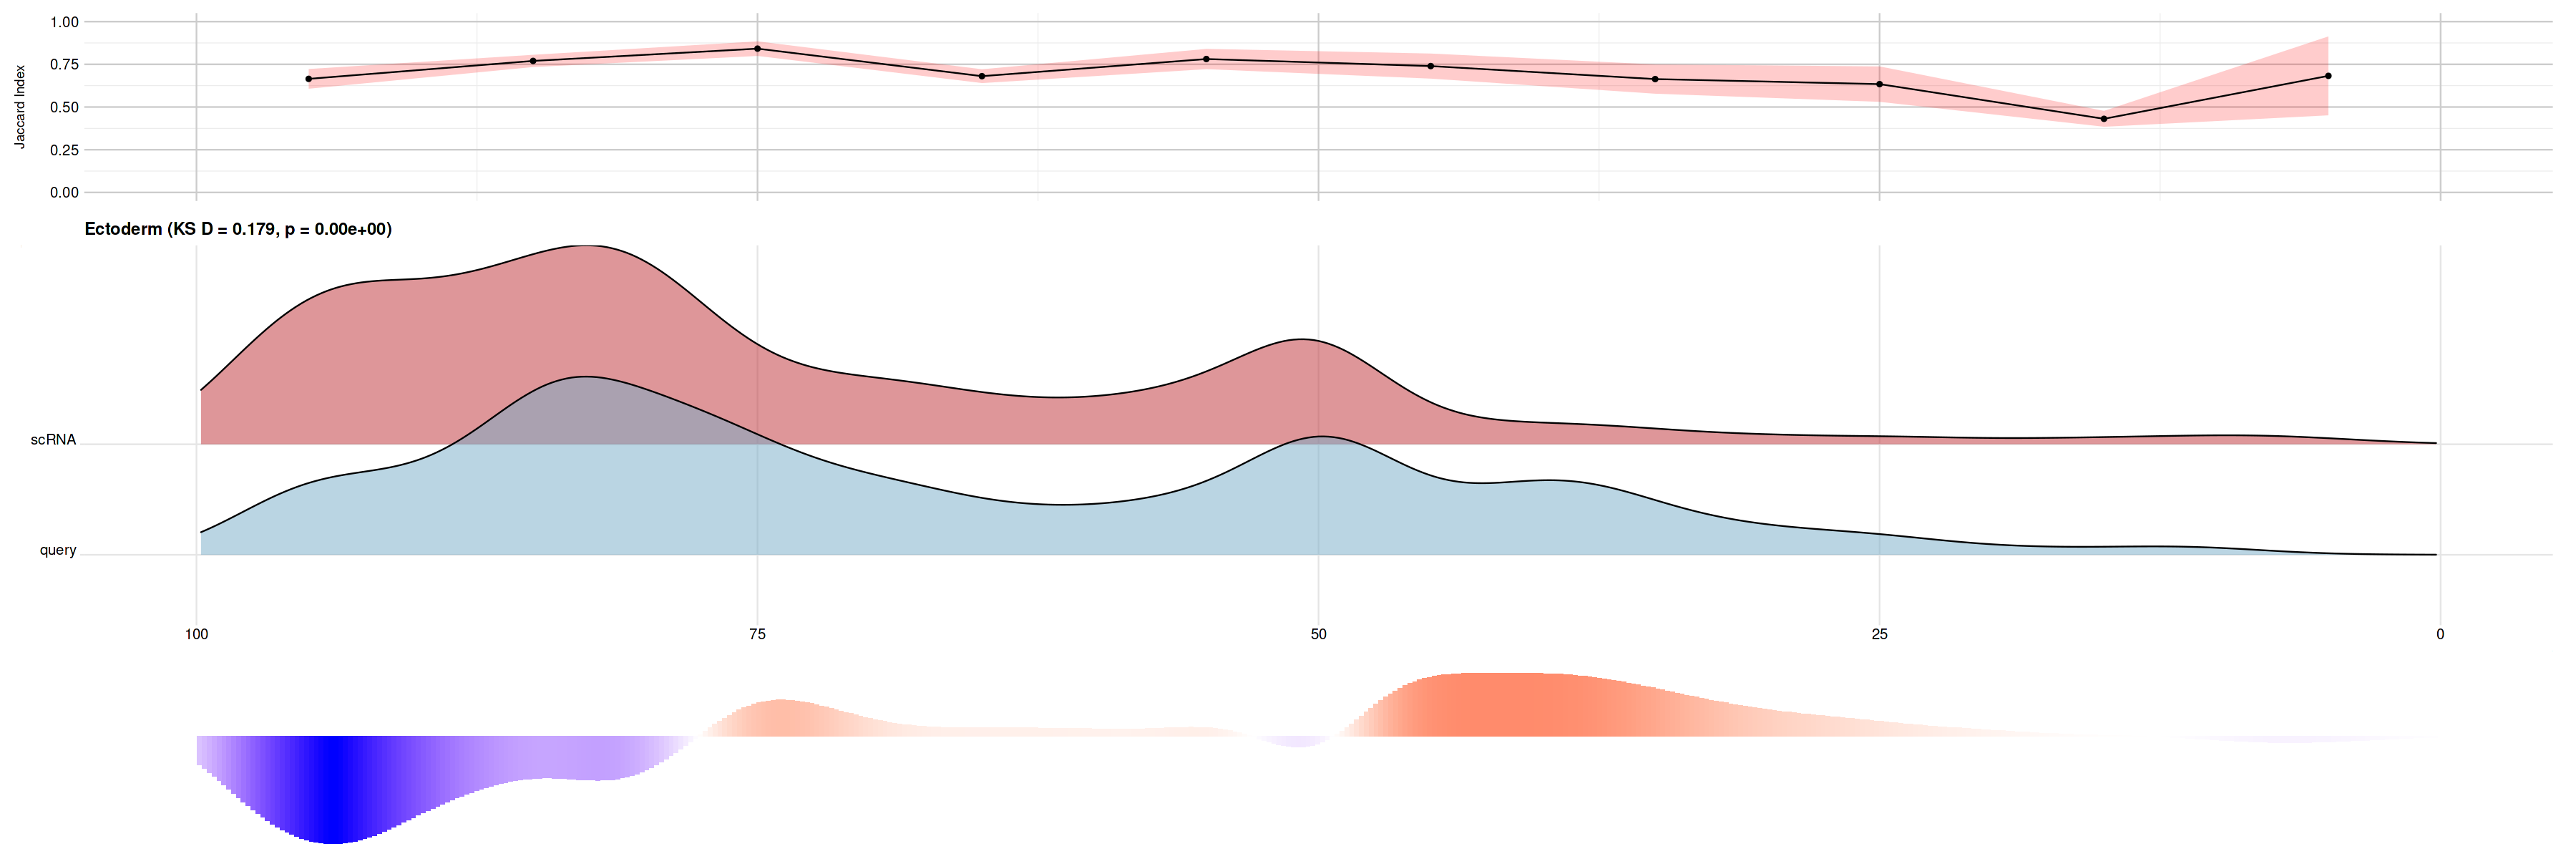

In [35]:
# Define fixed AP bins every 10 units
fixed_AP_bins <- seq(100, 0, by = -10)

# Function to compute Jaccard Index at fixed AP bins
compute_metrics_fixed_bins <- function(df) {
  results <- data.frame(AP_midpoint = numeric(), Jaccard_index = numeric())

  df <- df %>% filter(!is.na(AP))  # Remove NA values before filtering

  for (i in seq_along(fixed_AP_bins)[-length(fixed_AP_bins)]) {
    bin_start <- fixed_AP_bins[i]
    bin_end <- fixed_AP_bins[i + 1]
    AP_midpoint <- (bin_start + bin_end) / 2  

    bin_data <- df %>%
      filter(AP >= bin_end & AP < bin_start)

    scRNA_types <- unique(bin_data$refined_annotation[bin_data$dataset == "scRNA"])
    query_types <- unique(bin_data$refined_annotation[bin_data$dataset == "query"])
    
    jaccard_index <- ifelse(length(scRNA_types) == 0 | length(query_types) == 0, 0, 
                            length(intersect(scRNA_types, query_types)) / length(union(scRNA_types, query_types)))

    results <- rbind(results, data.frame(AP_midpoint, Jaccard_index = jaccard_index))
  }
  
  return(results)  
}

# Function to bootstrap Jaccard Index at fixed AP bins
bootstrap_jaccard_fixed_bins <- function(df, n_bootstraps = 100) {
  df <- df %>% filter(!is.na(AP))  # Remove NA values

  boot_results <- replicate(n_bootstraps, {
    subsampled_df <- df %>% group_by(dataset) %>% sample_frac(0.8, replace = TRUE) %>% ungroup()
    compute_metrics_fixed_bins(subsampled_df)
  }, simplify = FALSE)

  boot_df <- bind_rows(boot_results, .id = "bootstrap_id")

  summary_df <- boot_df %>%
    group_by(AP_midpoint) %>%
    summarise(
      Jaccard_mean = mean(Jaccard_index, na.rm = TRUE),
      Jaccard_sd = sd(Jaccard_index, na.rm = TRUE)  
    ) %>%
    drop_na()  

  return(summary_df)
}

# Function to create combined plots (without stacked bar chart)
create_combined_plot <- function(df, annotation_colors, germ_layer) {
  df <- df %>% filter(!is.na(AP), is.finite(AP))  # Remove NA values before analysis

  scRNA_data <- df %>% filter(dataset == "scRNA")
  query_data <- df %>% filter(dataset == "query")

  # Ensure no NA values in AP column before running KS test
  scRNA_data <- scRNA_data %>% filter(!is.na(AP))
  query_data <- query_data %>% filter(!is.na(AP))

  ks_result <- ks.test(jitter(scRNA_data$AP), jitter(query_data$AP))
  message(paste0("KS Test for ", germ_layer, 
                 ": D = ", round(ks_result$statistic, 3), 
                 ", p-value = ", formatC(ks_result$p.value, format = "e", digits = 2)))

  scRNA_density <- density(scRNA_data$AP, na.rm = TRUE)
  query_density <- density(query_data$AP, na.rm = TRUE)

  density_df <- data.frame(
    AP = scRNA_density$x,  
    scRNA_density = scRNA_density$y,  
    query_density = approx(query_density$x, query_density$y, scRNA_density$x)$y  
  ) %>%
    mutate(difference = query_density - scRNA_density)

  jaccard_results <- bootstrap_jaccard_fixed_bins(df)

  # Jaccard Index Plot with ±SD Ribbon
  p0 <- ggplot(jaccard_results, aes(x = AP_midpoint, y = Jaccard_mean)) +
    geom_ribbon(aes(ymin = pmax(Jaccard_mean - Jaccard_sd, 0), ymax = pmin(Jaccard_mean + Jaccard_sd, 1)),
                fill = "red", alpha = 0.2) +  
    geom_line(size = 0.5, color = "black") +
    geom_point(size = 1.5, color = "black") +
    labs(y = "Jaccard Index") +  
    theme_minimal() +  
    xlim(100, 0) + 
    ylim(0, 1) +
    theme(
      axis.line.x = element_blank(),  
      axis.ticks.x = element_blank(),  
      axis.text.x = element_blank(),  
      axis.title.x = element_blank(),  
      axis.text.y = element_text(size = 12, color = "black"),  
      panel.grid.major = element_line(color = "gray80", size = 0.5)  
    )

  # Density Ridge Plot
  p1 <- ggplot(df, aes(x = AP, y = dataset, fill = dataset)) +
    geom_density_ridges(alpha = 0.5) +
    theme_ridges() +
    ggtitle(paste0(
        germ_layer, 
        " (KS D = ", round(ks_result$statistic, 3), 
        ", p = ", formatC(ks_result$p.value, format = "e", digits = 2), ")"
    )) +
    theme(
        legend.position = "none",
        text = element_text(size = 12),
        axis.title = element_text(size = 0),
        axis.text = element_text(size = 12)
    ) +
    scale_fill_manual(values = alpha(annotation_colors, 0.5)) +
    xlim(100, 0)

  # Density Difference Plot
  p3 <- ggplot(density_df, aes(x = AP, y = difference, fill = difference)) +
    geom_col() +
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
    xlim(100, 0) +
    theme_void() +
    theme(legend.position = "none")

  # Combine all plots (Without p_top)
  combined_plot <- p0 / p1 / p3 + plot_layout(heights = c(2, 4, 2))
  return(combined_plot)
}

# Generate combined plots
mesoderm_plot <- create_combined_plot(df_mesoderm, annotation_colors, "Mesoderm")
endoderm_plot <- create_combined_plot(df_endoderm, annotation_colors, "Endoderm")
ectoderm_plot <- create_combined_plot(df_ectoderm, annotation_colors, "Ectoderm")

# Display plots
mesoderm_plot
endoderm_plot
ectoderm_plot

# Save the plots
ggsave(filename = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/figures/mesoderm_AP_plot.svg", 
       plot = mesoderm_plot, 
       width = 10, height = 8, device = "svg")

ggsave(filename = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/figures/endoderm_AP_plot.svg", 
       plot = endoderm_plot, 
       width = 10, height = 8, device = "svg")

ggsave(filename = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/figures/ectoderm_AP_plot.svg", 
       plot = ectoderm_plot, 
       width = 10, height = 8, device = "svg")

## Generate Somitic Tissue AP Plots

In [36]:
options(repr.plot.width=10, repr.plot.height=8)

# Plot the densities for scRNA, gastruloid
somitic_plot <- ggplot(df_somitic, aes(x = AP, y = dataset, fill = refined_annotation)) +
    geom_density_ridges(alpha = 0.5) +  # Plot original densities for scRNA and gastruloid
    theme_ridges() +
    ggtitle(NULL) +
    theme(
      legend.position = "none",
      text = element_text(size = 12),  # Set font size for all text elements
      axis.title = element_text(size = 0),  # Font size for axis titles
      axis.text = element_text(size = 12)) +
    scale_fill_manual(values = alpha(Harland_colors, 0.5)) +  # Apply alpha to colors for original datasets
    xlim(100, 0) + 
    facet_wrap(~refined_annotation, ncol = 2)


# Save the plots
ggsave(filename = "projects/03_seqFISH_FINAL/code/CELL_GENOMICS_REVISIONS/outputs/bioinformatics_pipeline/figures/somitic_AP_plot.svg", 
       plot = somitic_plot, 
       width = 10, height = 8, device = "svg")

Picking joint bandwidth of 0.775

Picking joint bandwidth of 2.39

Picking joint bandwidth of 1.01

Picking joint bandwidth of 3.53

Picking joint bandwidth of 1.98

Picking joint bandwidth of 0.637

Warning message:
“Removed 40 rows containing non-finite values (`stat_density_ridges()`).”


# Package Version Information

In [37]:
# Print package versions at the end of the script
loaded_packages <- sessionInfo()$otherPkgs  # Get all loaded non-base packages
package_versions <- sapply(loaded_packages, function(pkg) pkg$Version)  # Extract versions

# Print package names and versions
print(package_versions)

              Matrix        BiocNeighbors                tidyr 
             "1.5-1"             "1.16.0"              "1.3.0" 
              UpSetR                abind                  png 
             "1.4.0"              "1.4-5"              "0.1-8" 
            ggridges            batchelor             pheatmap 
             "0.5.4"             "1.12.3"             "1.0.12" 
              plotly                   sp         SeuratObject 
            "4.10.0"              "1.5-0"              "4.1.2" 
              Seurat            patchwork              harmony 
             "4.2.0"              "1.1.2"              "0.1.0" 
                Rcpp                scran              StabMap 
            "1.0.10"             "1.26.2"              "0.1.8" 
              igraph               scater              scuttle 
             "1.4.1"             "1.24.0"              "1.8.4" 
        RColorBrewer              SingleR              celldex 
             "1.1-3"             "1.10.0